In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, \
    confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('dataset-cleaning.csv', encoding='utf-8')

target_column = 'CAUSAL_PARALIZACION'
columns_categorical = [col for col in data.columns if data[col].dtype == 'object' and col != target_column]
data = pd.get_dummies(data, columns=columns_categorical, drop_first=True)
data.to_csv('forest.csv', encoding='utf-8')

In [2]:
X = data.drop(columns=[target_column])
y = data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)
rf_model = RandomForestClassifier(n_estimators=100,
                                  random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
model_performance = {
    'Precisión': accuracy,
    'Reporte de Clasificación': report}
print(f"Precisión: {model_performance['Precisión']}\n")
print("Reporte de Clasificación:\n")
print(model_performance['Reporte de Clasificación'])

Precisión: 0.8047007511509571

Reporte de Clasificación:

                                             precision    recall  f1-score   support

10 FALTA DE RECURSOS FINANCIEROS Y LIQUIDEZ       0.83      0.78      0.81       886
                                   14 OTROS       0.80      0.86      0.83      2111
               2 INCUMPLIMIENTO DE CONTRATO       0.79      0.72      0.75      1130

                                   accuracy                           0.80      4127
                                  macro avg       0.81      0.79      0.80      4127
                               weighted avg       0.80      0.80      0.80      4127



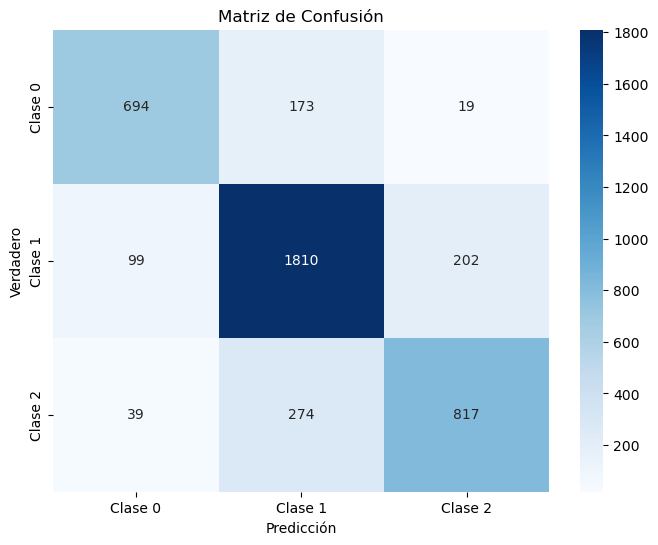

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Clase 0', 'Clase 1', 'Clase 2'],
            yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

# feature_importances = pd.DataFrame({
#     'Característica': X.columns,
#     'Importancia': rf_model.feature_importances_
# }).sort_values(by='Importancia', ascending=False)

# y_prob = rf_model.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# auc_score = roc_auc_score(y_test, y_prob)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
# plt.plot([0, 1], [0, 1], 'k--', label='Modelo aleatorio')
# plt.xlabel('Tasa de Falsos Positivos (FPR)')
# plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
# plt.title('Curva ROC')
# plt.legend()
# plt.show()

In [10]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree = rf_model.estimators_[0]

plt.figure(figsize=(180, 100))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=label_encoder.classes_,
    max_depth=10,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión (Profundidad Limitada)")
plt.savefig('tree-random.png', dpi=150, bbox_inches='tight')
plt.show()

NameError: name 'label_encoder' is not defined

<Figure size 18000x10000 with 0 Axes>

                                       Característica  Importancia
8                                       AVANCE_FISICO     0.091803
3                                  SALDO_DE_INVERSION     0.074922
2                                   COSTO_ACTUALIZADO     0.074681
1                               COSTO_DE_OBRA-EXP_TEC     0.072220
6                                      ULT_AVANCE_ANO     0.069268
..                                                ...          ...
44             SECTOR_MUJER Y POBLACIONES VULNERABLES     0.000067
82  UNIDAD_ORGANICA_SUBGERENCIA DE CONTROL DEL SEC...     0.000045
49               SECTOR_PRESIDENCIA CONSEJO MINISTROS     0.000015
13         MODALIDAD_DE_EJECUCION_GOBIERNO A GOBIERNO     0.000012
48                              SECTOR_PODER JUDICIAL     0.000005

[93 rows x 2 columns]


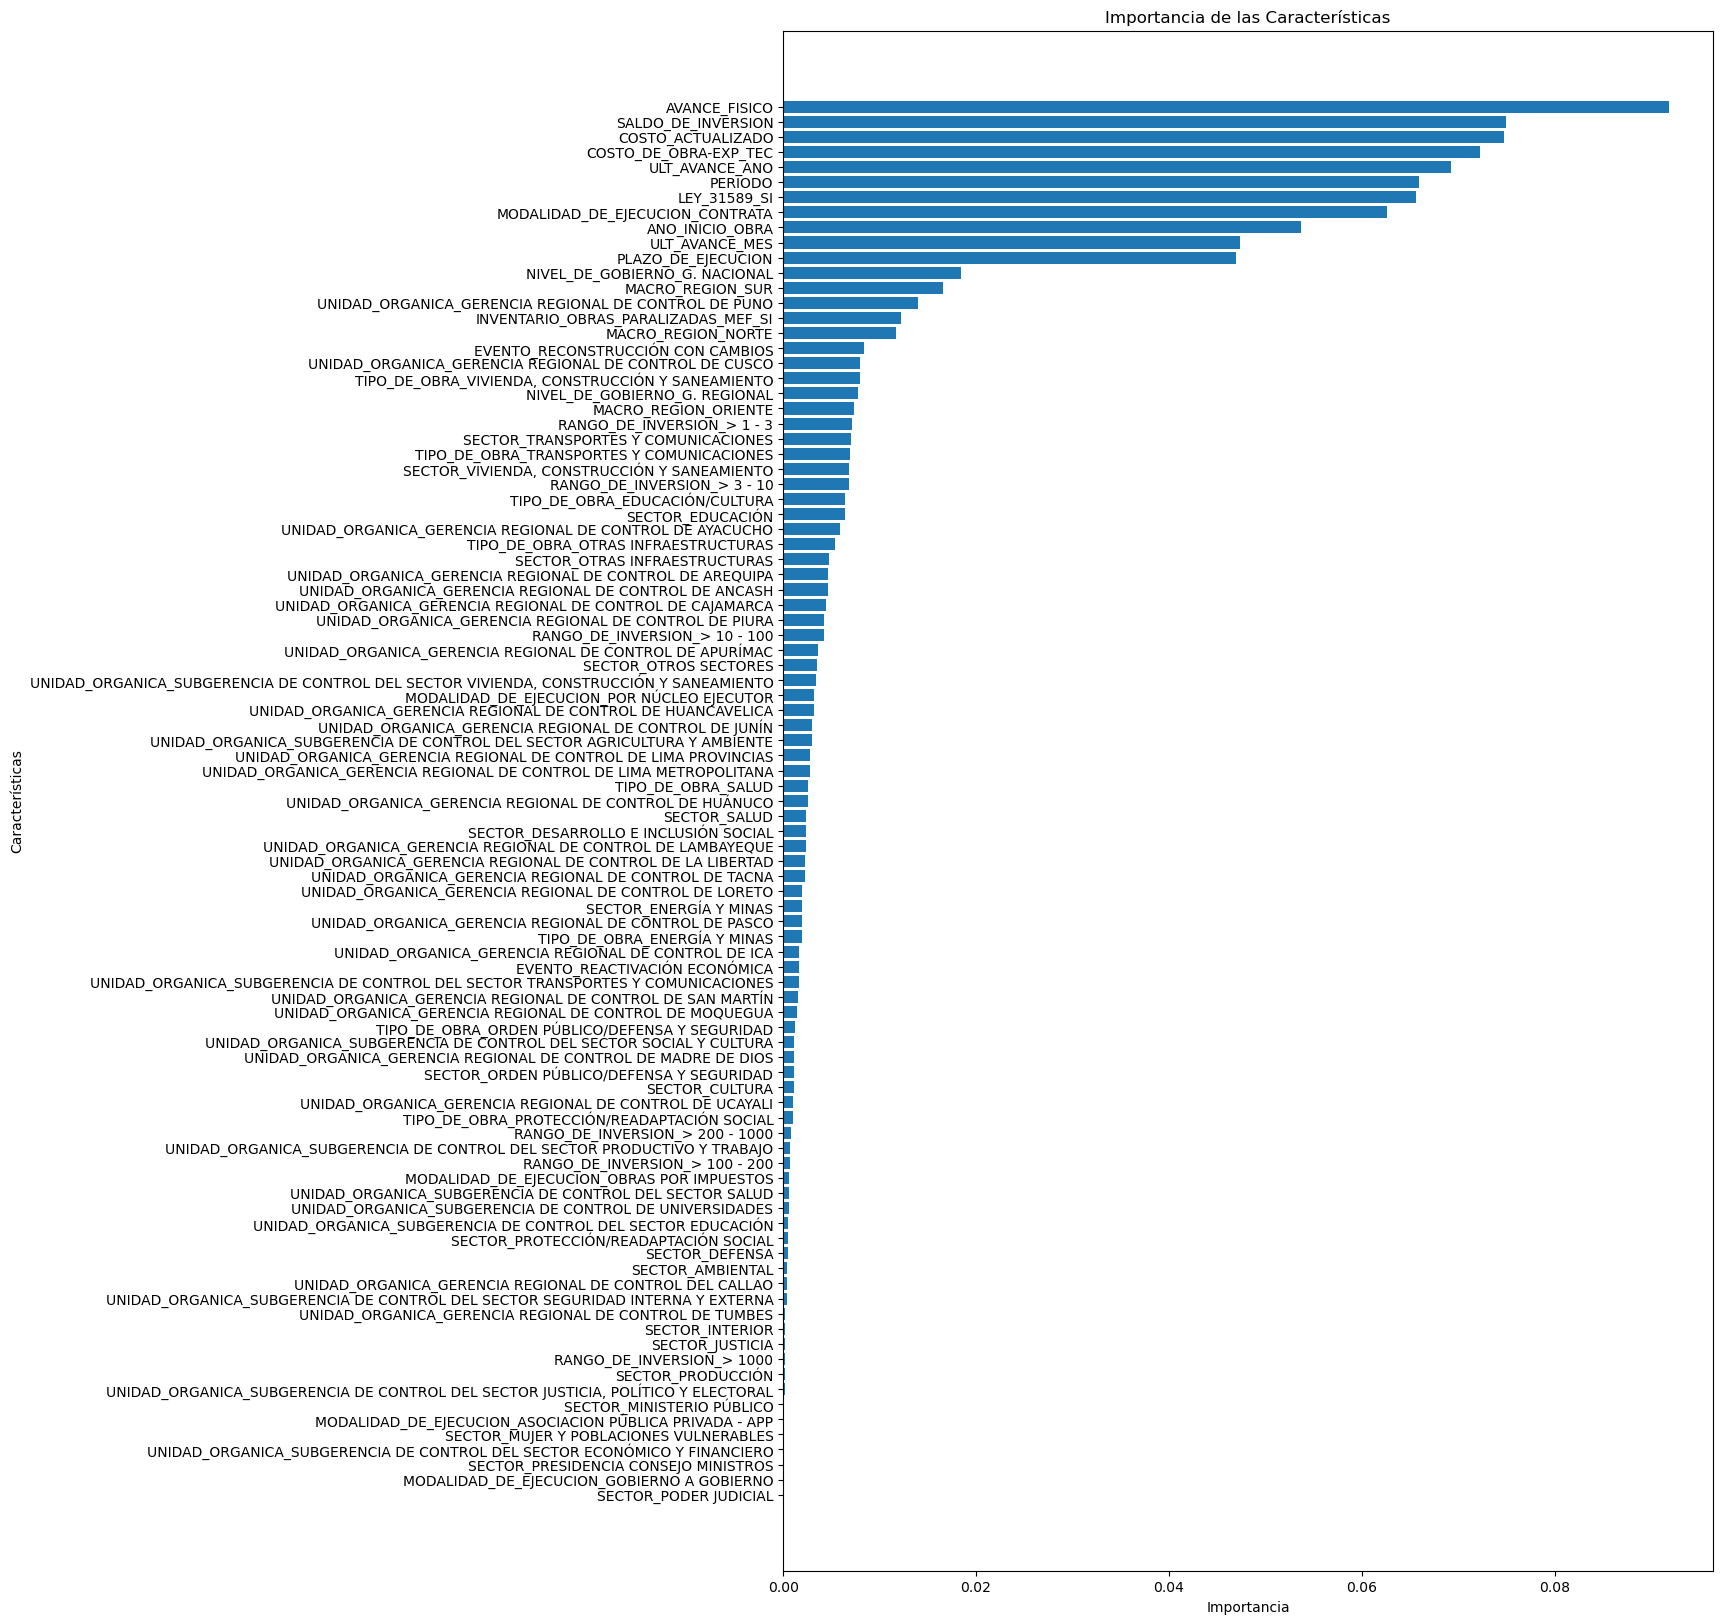

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener la importancia de las características
importances = rf_model.feature_importances_

# Crear un DataFrame para visualizar las importancias
importance_df = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Mostrar el DataFrame de Importancia
print(importance_df)

# Visualización de la Importancia
plt.figure(figsize=(12, 20))
plt.barh(importance_df['Característica'], importance_df['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características')
plt.gca().invert_yaxis()  # Invertir el eje para que la más importante esté arriba
plt.savefig('importance.png', dpi=150, bbox_inches='tight')
plt.show()
